# English Movie : An Analytical and Forecast

TALK WITH THE DATA!!

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [3]:
filename = 'english_movies.csv'

In [4]:
df = pd.read_csv(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         10000 non-null  object 
 1   overview      9995 non-null   object 
 2   release_date  9982 non-null   object 
 3   genres        9978 non-null   object 
 4   popularity    10000 non-null  float64
 5   vote_average  10000 non-null  float64
 6   vote_count    10000 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 547.0+ KB


Null data is less than 25% of total entries. Therefore deleting rows should do the job

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9959 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         9959 non-null   object 
 1   overview      9959 non-null   object 
 2   release_date  9959 non-null   object 
 3   genres        9959 non-null   object 
 4   popularity    9959 non-null   float64
 5   vote_average  9959 non-null   float64
 6   vote_count    9959 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 622.4+ KB


In [6]:
# We can Extract Release Year from Release date to accomplish further analytics

df.release_date = pd.to_datetime(df.release_date)
df['release_year'] = df.release_date.dt.to_period('Y').dt.year
df

,title,overview,release_date,genres,popularity,vote_average,vote_count,release_year
0,The Flash,When his attempt to save his family inadverten...,2023-06-13,"Action, Adventure, Science Fiction",4631.142,6.9,1773,2023
1,Barbie,Barbie and Ken are having the time of their li...,2023-07-19,"Comedy, Adventure, Fantasy",4493.487,7.6,1621,2023
2,Transformers: Rise of the Beasts,When a new threat capable of destroying the en...,2023-06-06,"Action, Adventure, Science Fiction",4090.661,7.5,2065,2023
3,The Little Mermaid,"The youngest of King Triton’s daughters, and t...",2023-05-18,"Adventure, Family, Fantasy, Romance",4075.869,6.4,1182,2023
4,"Ruby Gillman, Teenage Kraken","Ruby Gillman, a sweet and awkward high school ...",2023-06-28,"Animation, Family, Fantasy, Comedy",2164.714,7.8,308,2023
...,...,...,...,...,...,...,...,...
9994,Big Buck Bunny,Follow a day of the life of Big Buck Bunny whe...,2008-04-10,"Animation, Comedy, Family",6.621,6.5,169,2008
9995,Blood Creek,A man and his brother on a mission of revenge ...,2009-10-09,"Horror, Thriller",6.610,5.3,223,2009
9997,Comanche Station,A man saves a woman who had been kidnapped by ...,1960-03-01,Western,6.574,6.6,88,1960
9998,Bait,"Martin Ward is a cove fisherman, without a boa...",2019-03-26,Drama,6.569,7.0,70,2019


In [21]:
df.describe()

,popularity,vote_average,vote_count,release_year
count,9959.000000,9959.000000,9959.000000,9959.000000
mean,29.371201,6.306697,1554.711417,2005.494829
std,105.942146,1.167903,2888.433339,16.953570
min,6.479000,0.000000,0.000000,1903.000000
25%,12.482500,5.900000,177.000000,1998.000000
50%,16.577000,6.400000,513.000000,2011.000000
75%,25.826500,7.000000,1526.000000,2018.000000
max,4631.142000,10.000000,34102.000000,2027.000000


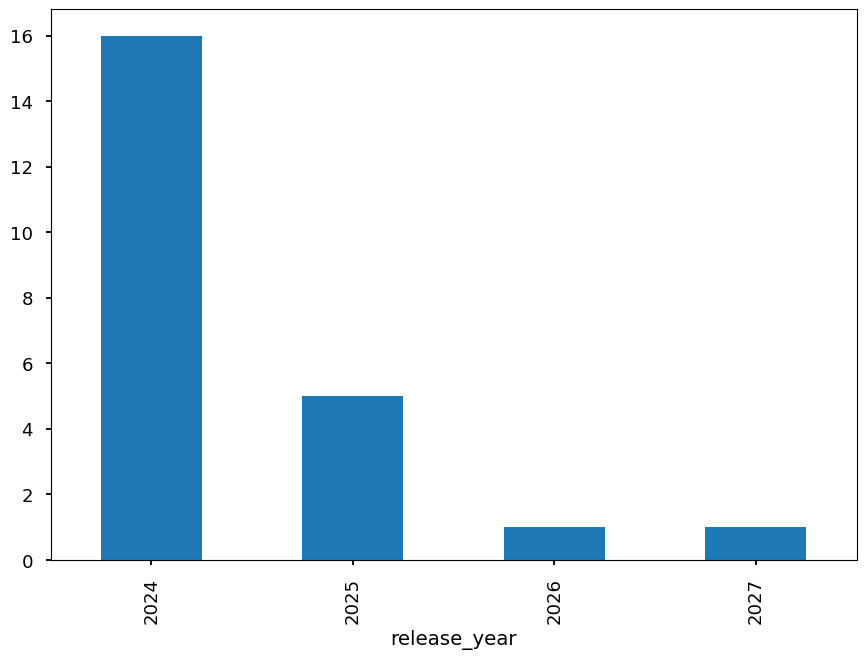

In [25]:
df[df.release_year > 2023].groupby('release_year')['title'].count().plot.bar()
plt.show()

In [27]:
df[df.release_year > 2023].groupby('release_year')['popularity'].mean()

release_year
2024    24.951
2025    21.643
2026    22.679
2027    25.058
Name: popularity, dtype: float64

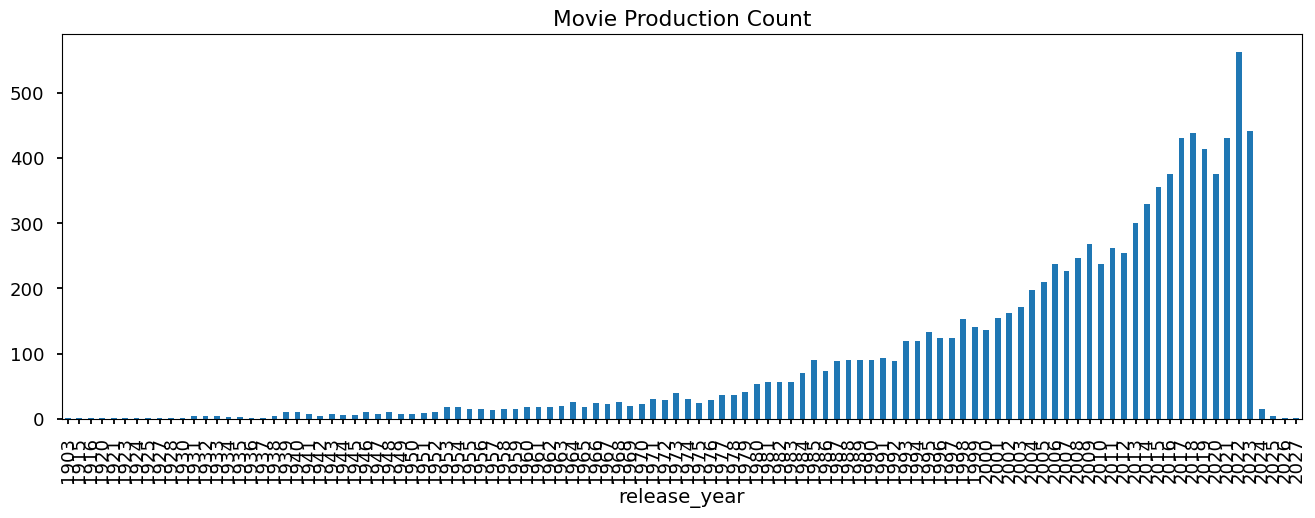

In [33]:
plt.figure(figsize=(16,5))
df.groupby('release_year')['title'].count().plot.bar()
plt.title('Movie Production Count')
plt.show()

- We Know that busy year for holywood was 2022.
- It shows that holywood movies is increased in production over years which lead to almost every year holywood movies suceed attract people to watch their movies 

In [8]:
from wordcloud import WordCloud

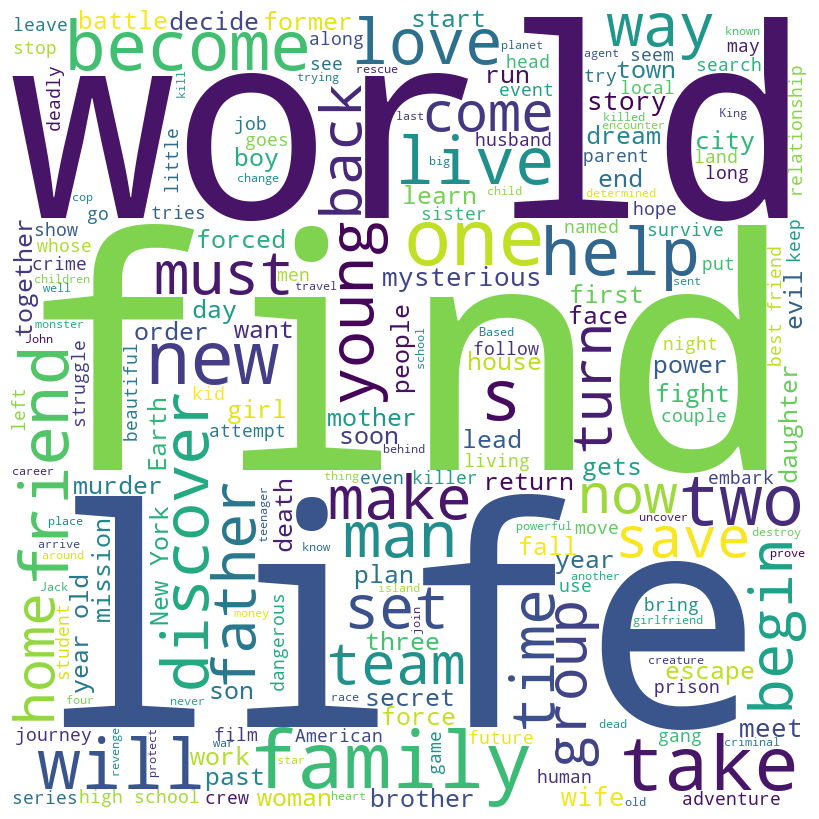

In [9]:
wc = WordCloud(width=800, height=800, background_color='white').generate(' '.join(df['overview']))

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

From wordcloud above we knew that most of holywood movies are telling aboud life, world, and finding someting/someone


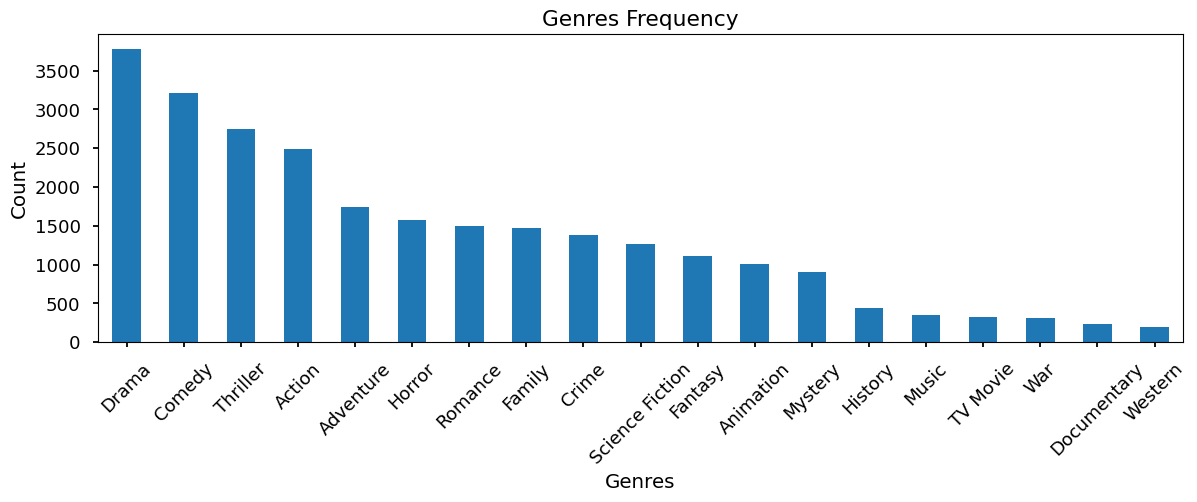

In [10]:
# lets moving on to genres


genre_counts = df.genres.str.split(', ').explode().value_counts()

plt.figure(figsize=(14,4))
genre_counts.plot.bar()
plt.title('Genres Frequency')
plt.xticks(rotation= 45)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()

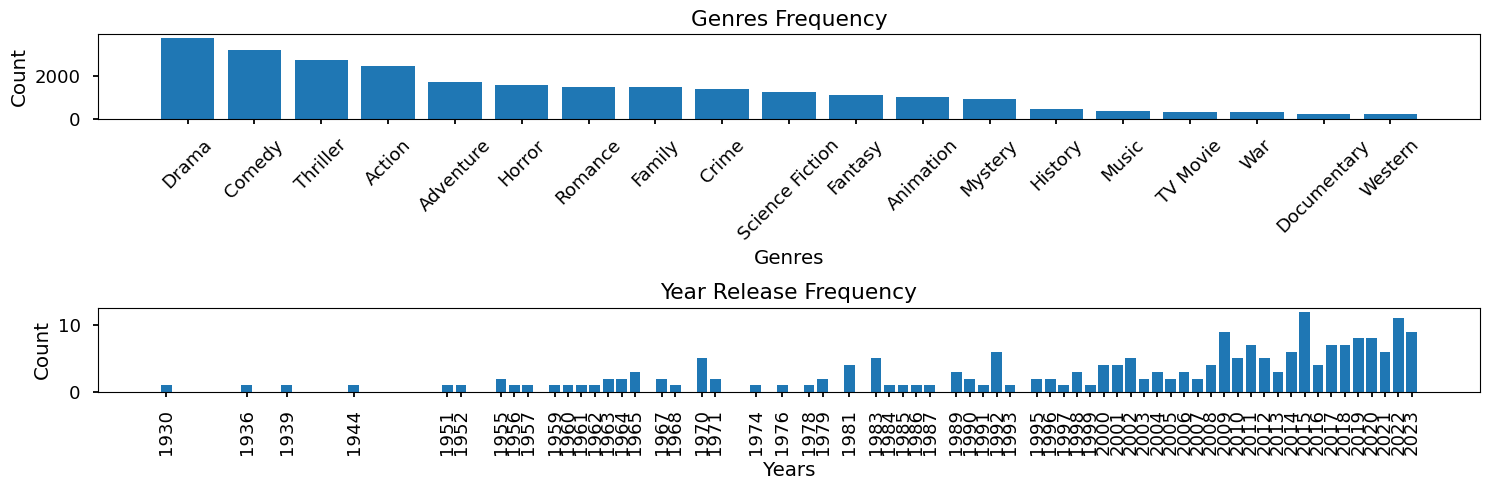

In [11]:
# From wordclouds before we know some words are mentioned often. Its make me curious, from which genre those words come from and when the release year
selected_words = ['Life','World','Find']

data = df[df.overview.str.contains('|'.join(selected_words))]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 5))

# First plot to show genres
temp_data = data.genres.str.split(', ').explode().value_counts()
ax[0].bar(genre_counts.index,genre_counts)
ax[0].set_title('Genres Frequency')
ax[0].set_xticks(genre_counts.index)
ax[0].set_xticklabels(genre_counts.index,rotation=45)
ax[0].set_xlabel('Genres')
ax[0].set_ylabel('Count')


# Second plot to show Years
temp_data = data.groupby('release_year')['title'].count()
ax[1].bar(temp_data.index,temp_data.values)
ax[1].set_title('Year Release Frequency')
ax[1].set_xticks(temp_data.index)
ax[1].set_xticklabels(temp_data.index,rotation=90)
ax[1].set_xlabel('Years')
ax[1].set_ylabel('Count')


plt.tight_layout()
plt.show()

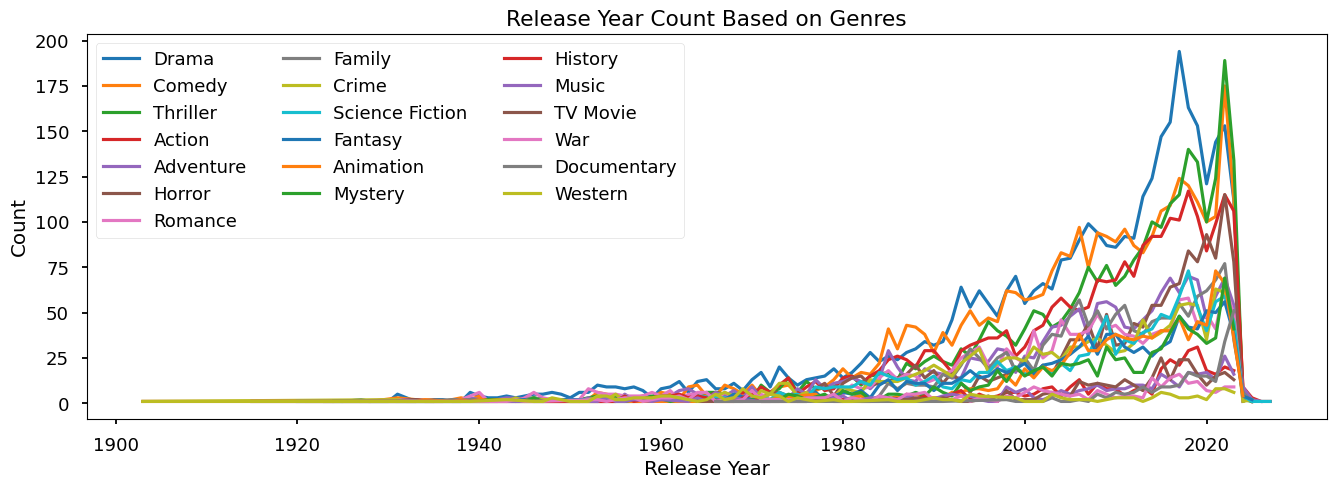

In [12]:
# Lets dive deep more into genres

plt.figure(figsize=(16,5))
for genre in genre_counts.index:
    df[df.genres.str.contains(genre)].groupby('release_year')['title'].count().plot()

plt.legend(genre_counts.index,ncol=3)
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Release Year Count Based on Genres")
plt.show()


- Top 3 Genres are Drama, War and Action
- Most word (World, Life, Find) are in top 3 genres
- Most of Genres are experiencing growth in production over years. But after 2021 (Peak) its decresing
- We can consider that holywood sucessfully growing as movie industry

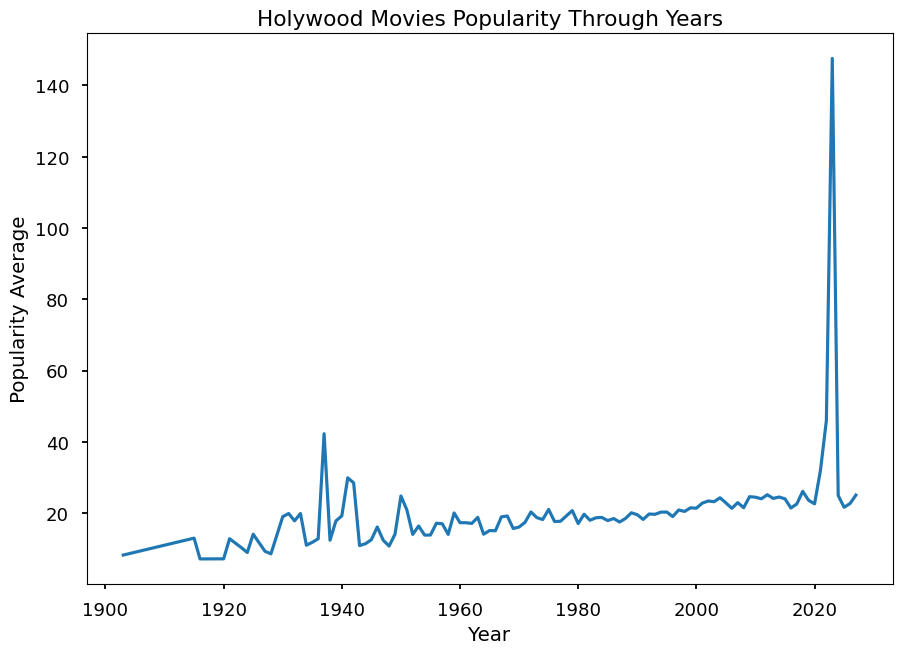

In [13]:
# Moving on into Popularity


df.groupby('release_year')['popularity'].mean().plot()
plt.title('Holywood Movies Popularity Through Years')
plt.ylabel('Popularity Average')
plt.xlabel('Year')
plt.show()

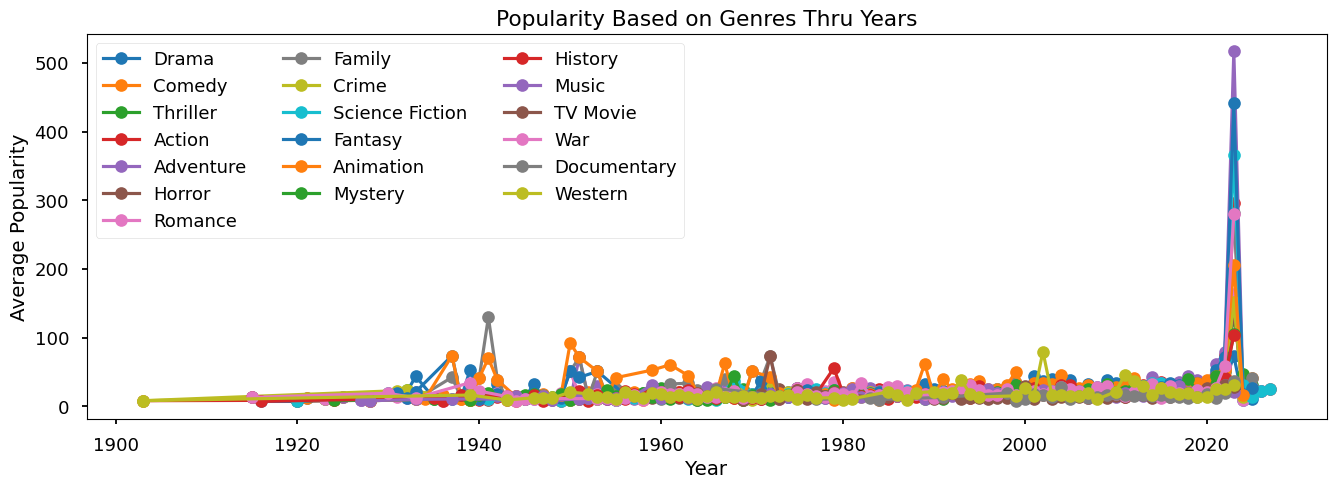

In [20]:

plt.figure(figsize=(16,5))
for genre in genre_counts.index:
    df[df.genres.str.contains(genre)].groupby('release_year')['popularity'].mean().plot(marker='o')

plt.legend(genre_counts.index,ncol=3)
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.title("Popularity Based on Genres Thru Years")
plt.show()


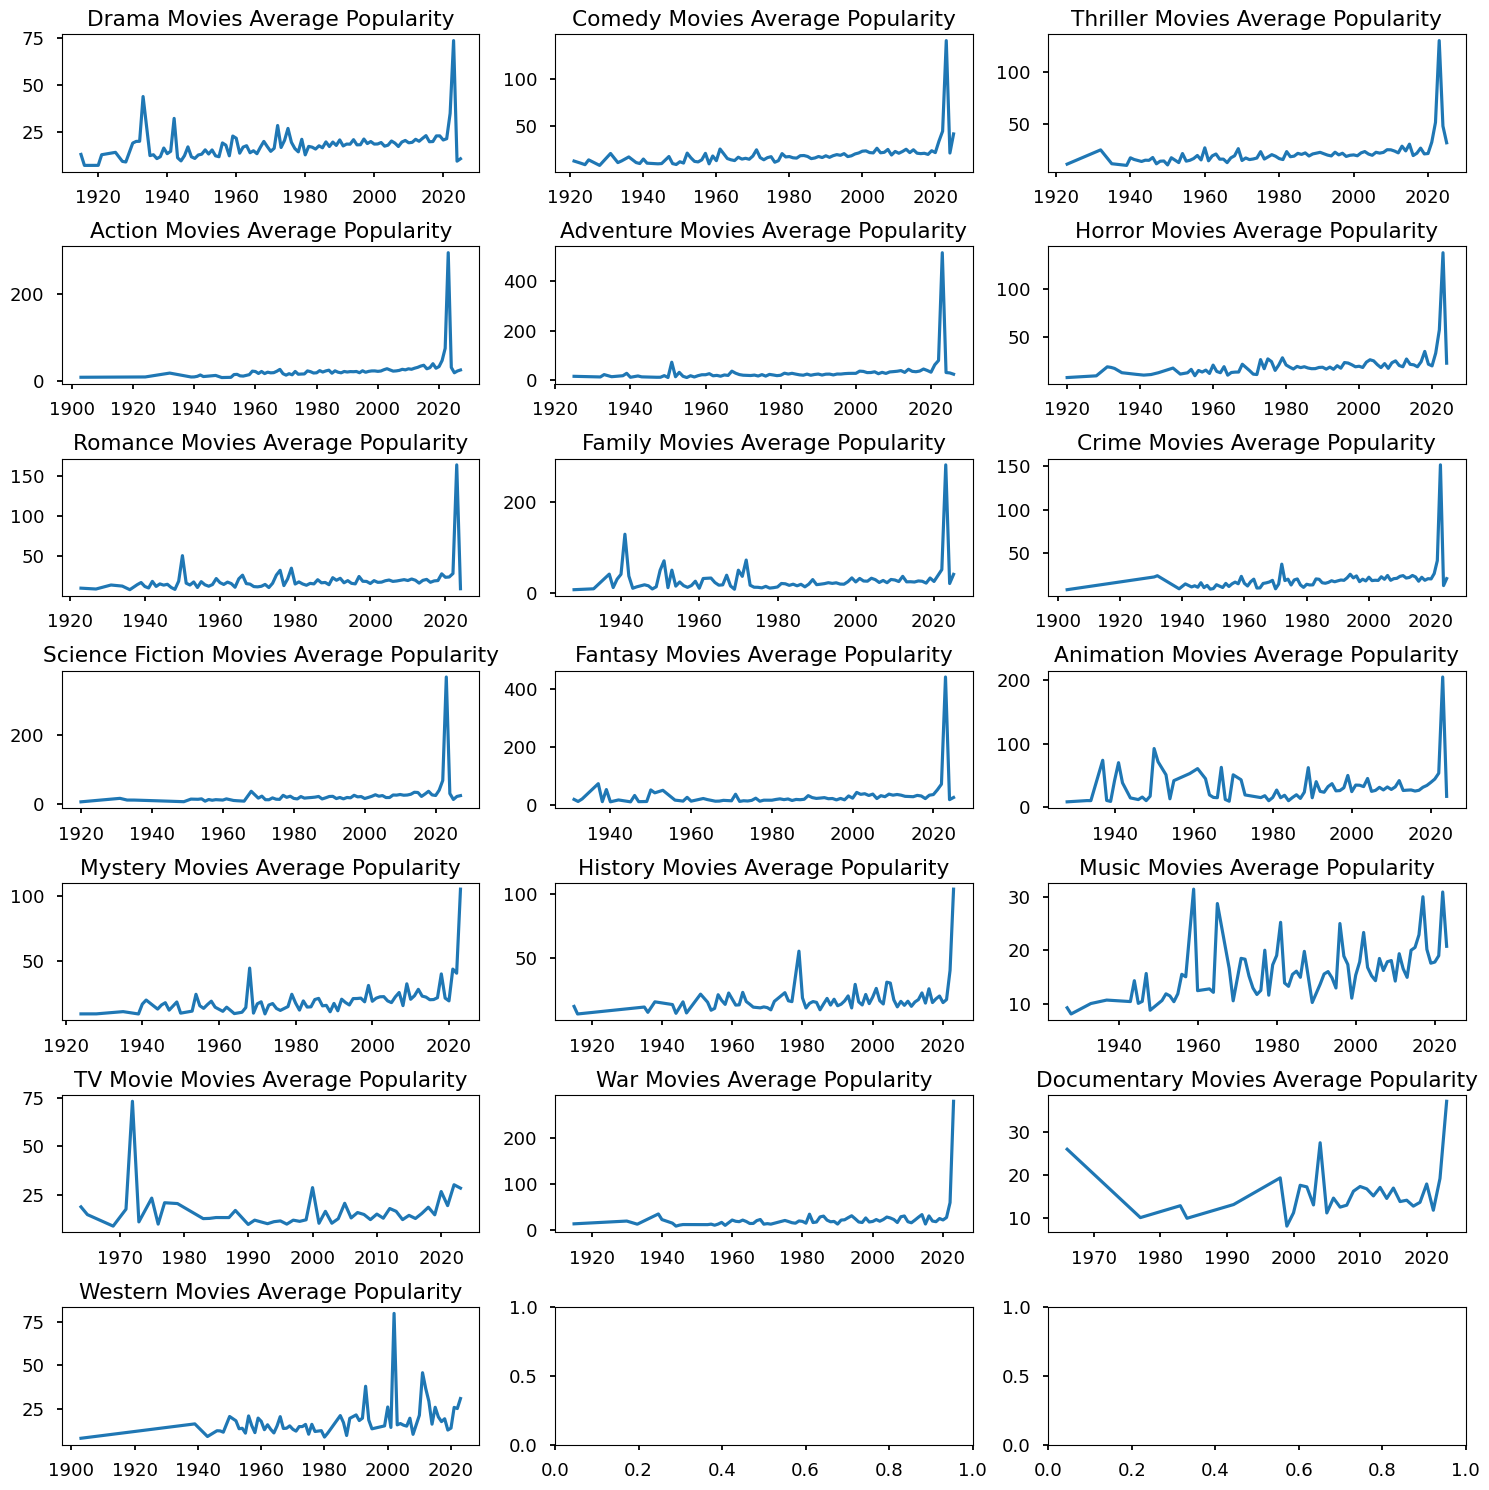

In [17]:
#Graph above seems not readable. Lets divide it

fig, ax = plt.subplots(nrows=7, ncols=3, figsize=(15, 15))
ax = ax.flatten() # Flatten the axes so we could place every plots without minding the dimension

for i,genre in enumerate(genre_counts.index):
    average = df[df.genres.str.contains(genre)].groupby('release_year')['popularity'].mean()
    ax[i].plot(average.index,average.values)
    ax[i].set_title(f"{genre} Movies Average Popularity")

plt.tight_layout()
plt.show()

- Some of genre get recognized on its early release like TV Movies, Music, Animation
- Some of genre also get recognized on early 2000's like Thriller, Action, Fantasy
- Some of genre start to be productioned before 1950
- Most of genres are spiking on 2023. This is might be affected by amount of movies that producted on that year 
- Since most of popularity are growing thru years. This can help the theory before where holywood is sucesfull as Movie Industry